<a href="https://colab.research.google.com/github/anshulsolanki/stock_analysis/blob/main/Nifty_Monthly_SIP_with_sell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install dependency if needed:
!pip install yfinance matplotlib

In [7]:
# pip install yfinance matplotlib

import yfinance as yf
import matplotlib.pyplot as plt
import os

# Define the indices and their Yahoo Finance symbols
indices = {
    "Nifty 50": "^NSEI",
    "Bank Nifty": "^NSEBANK",
    "Nifty IT": "^CNXIT",
    "Nifty Pharma": "^CNXPHARMA",
    "Nifty FMCG": "^CNXFMCG",
    "Nifty Auto": "^CNXAUTO",
    "Nifty Metal": "^CNXMETAL"
}

# Fetch last 5 years of data
data = {}
for name, symbol in indices.items():
    df = yf.download(symbol, period="5y", interval="1d")
    data[name] = df
    print(f"{name} → {len(df)} rows fetched")

# Create directory if it doesn't exist
if not os.path.exists("nifty_data"):
    os.makedirs("nifty_data")

# Save
for name, df in data.items():
    df.to_pickle(f"nifty_data/{name.replace(' ', '_')}.pkl")

/tmp/ipython-input-3594090801.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, period="5y", interval="1d")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3594090801.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, period="5y", interval="1d")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3594090801.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, period="5y", interval="1d")


Nifty 50 → 1237 rows fetched
Bank Nifty → 1231 rows fetched


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3594090801.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, period="5y", interval="1d")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3594090801.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, period="5y", interval="1d")


Nifty IT → 1231 rows fetched
Nifty Pharma → 1236 rows fetched


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3594090801.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, period="5y", interval="1d")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3594090801.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, period="5y", interval="1d")


Nifty FMCG → 1222 rows fetched
Nifty Auto → 1222 rows fetched


[*********************100%***********************]  1 of 1 completed

Nifty Metal → 1222 rows fetched


In [10]:
# Load
import pandas as pd
loaded_data = {}
for name in indices.keys():
    loaded_data[name] = pd.read_pickle(f"nifty_data/{name.replace(' ', '_')}.pkl")

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Assuming `data` is your dictionary of 5-year DataFrames
# data = {
#     "Nifty 50": df_nifty50,
#     "Bank Nifty": df_banknifty,
#     ...
# }

# -----------------------------
# Helper: Convert time_frame to start_date
# -----------------------------
def get_start_date_from_df(df, time_frame):
    today = df.index.max()  # last date in the DataFrame
    if time_frame.endswith("y"):
        years = int(time_frame[:-1])
        return today - pd.DateOffset(years=years)
    elif time_frame.endswith("mo"):
        months = int(time_frame[:-2])
        return today - pd.DateOffset(months=months)
    elif time_frame.endswith("d"):
        days = int(time_frame[:-1])
        return today - timedelta(days=days)
    else:
        raise ValueError("Invalid time frame format. Use 'y', 'mo', or 'd'.")


In [22]:
# Choose colors for each index
colors = {
    "Nifty 50": "black",
    "Bank Nifty": "blue",
    "Nifty IT": "red",
    "Nifty Pharma": "brown",
    "Nifty FMCG": "green",
    "Nifty Auto": "orange",
    "Nifty Metal": "yellow"
}

# Choose line width for each index
linewidths = {
    "Nifty 50": 3.0,  # bold line
    "Bank Nifty": 1.5,
    "Nifty IT": 1.5,
    "Nifty Pharma": 1.5,
    "Nifty FMCG": 1.5,
    "Nifty Auto": 1.5,
    "Nifty Metal": 1.5
}

# -----------------------------
# Slice and Plot
# -----------------------------
def slice_and_plot(data, time_frame):
  plt.figure(figsize=(14,7))
  for name, df in data.items():
      start_date = get_start_date_from_df(df, time_frame)
      df_slice = df[df.index >= start_date]
      if not df_slice.empty:
          color = colors.get(name, None)
          lw = linewidths.get(name, 1.5)  # default line width 1.5
          plt.plot(df_slice.index, df_slice["Close"] / df_slice["Close"].iloc[0], label=name, color=color, linewidth=lw)

  plt.title(f"NSE Indices Performance ({time_frame})")
  plt.xlabel("Date")
  plt.ylabel("Normalized Close Price")
  plt.legend()
  plt.grid(True, linestyle="--", alpha=0.6)
  plt.show()

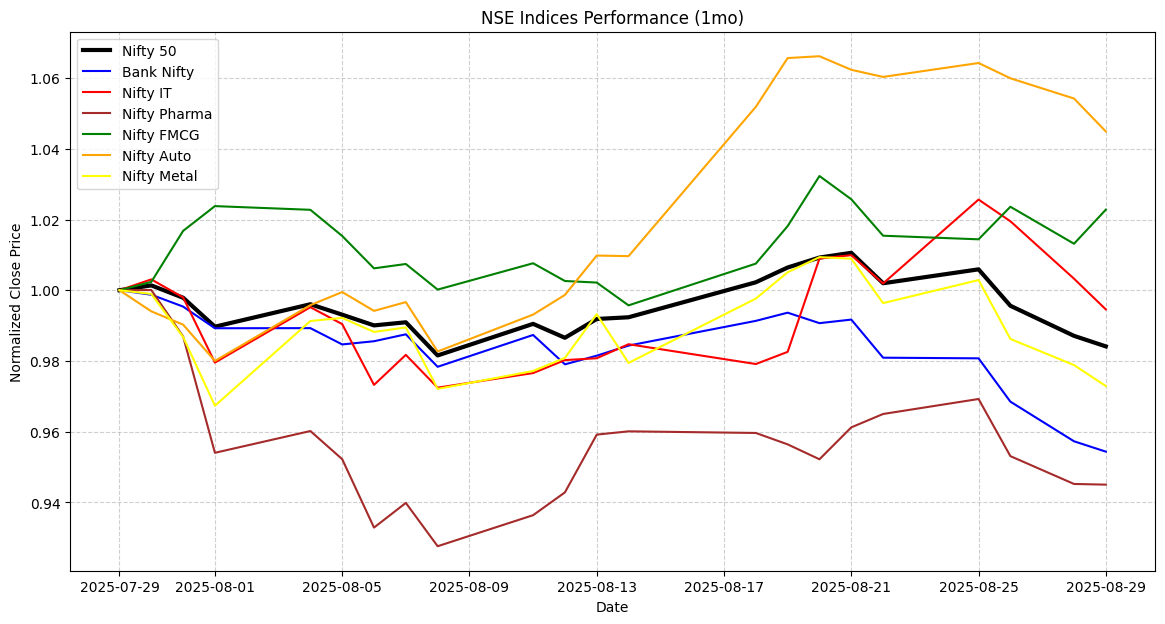

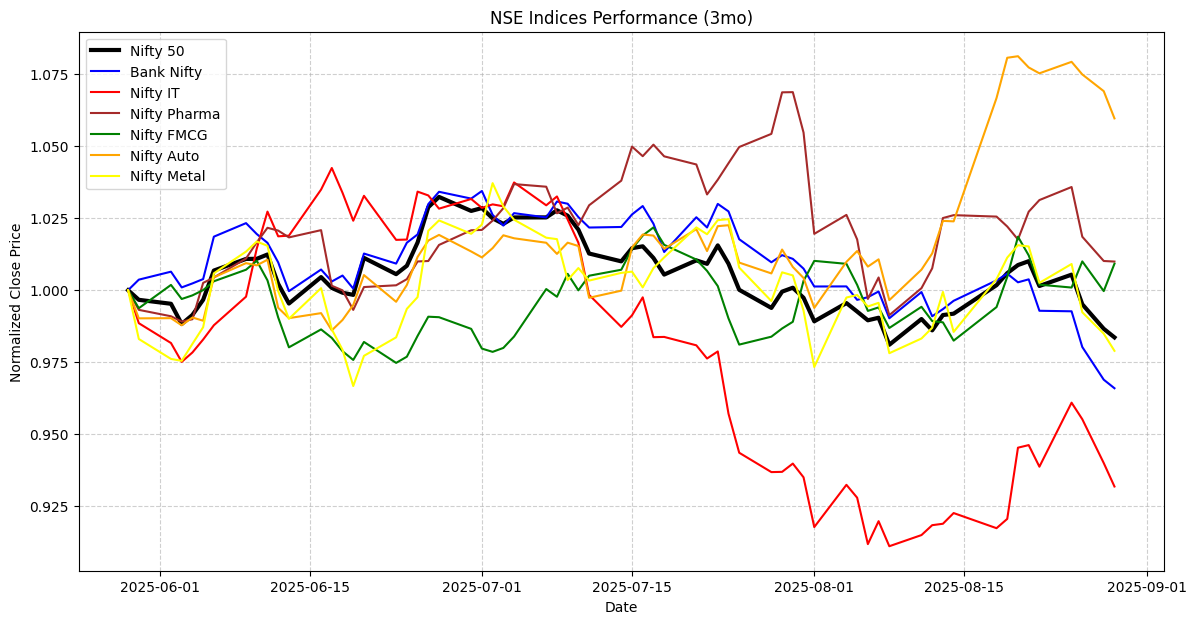

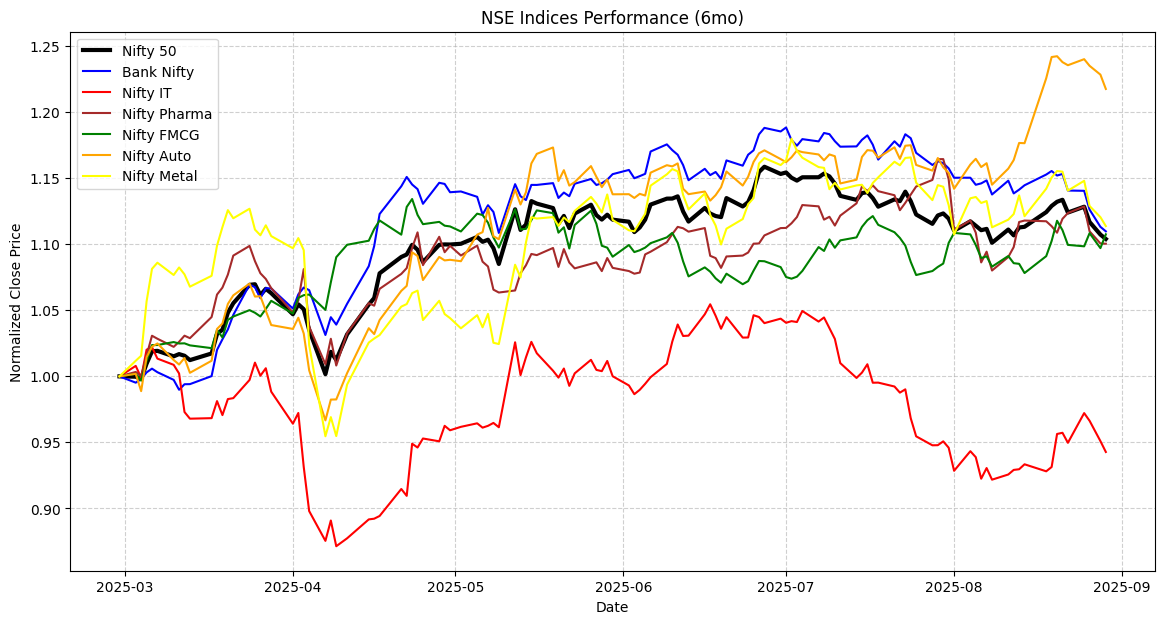

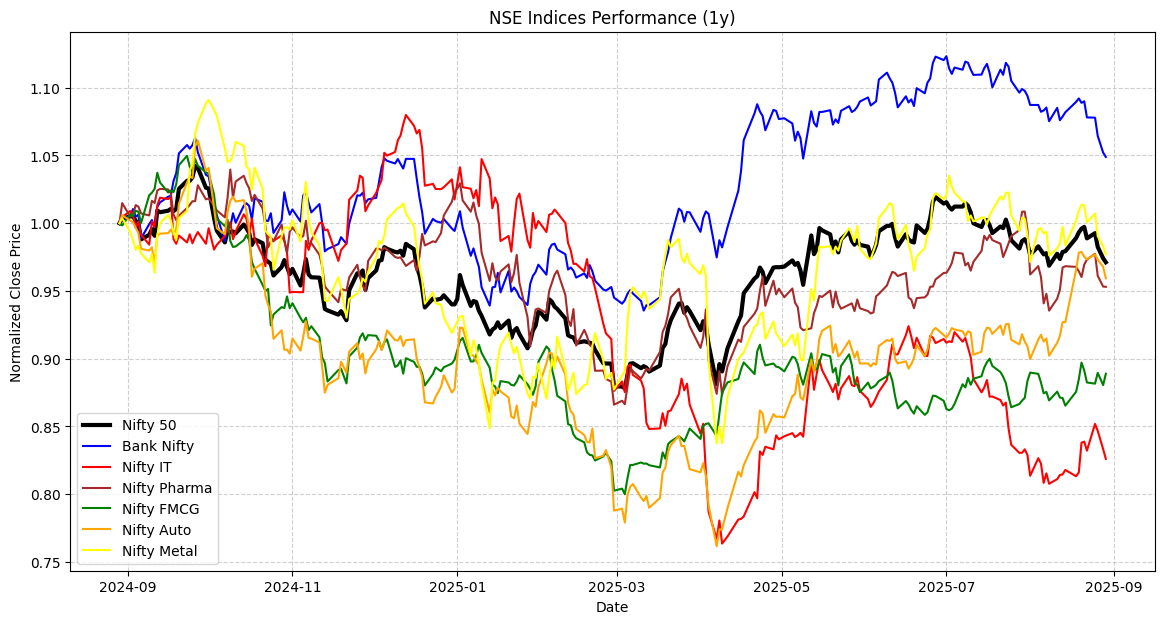

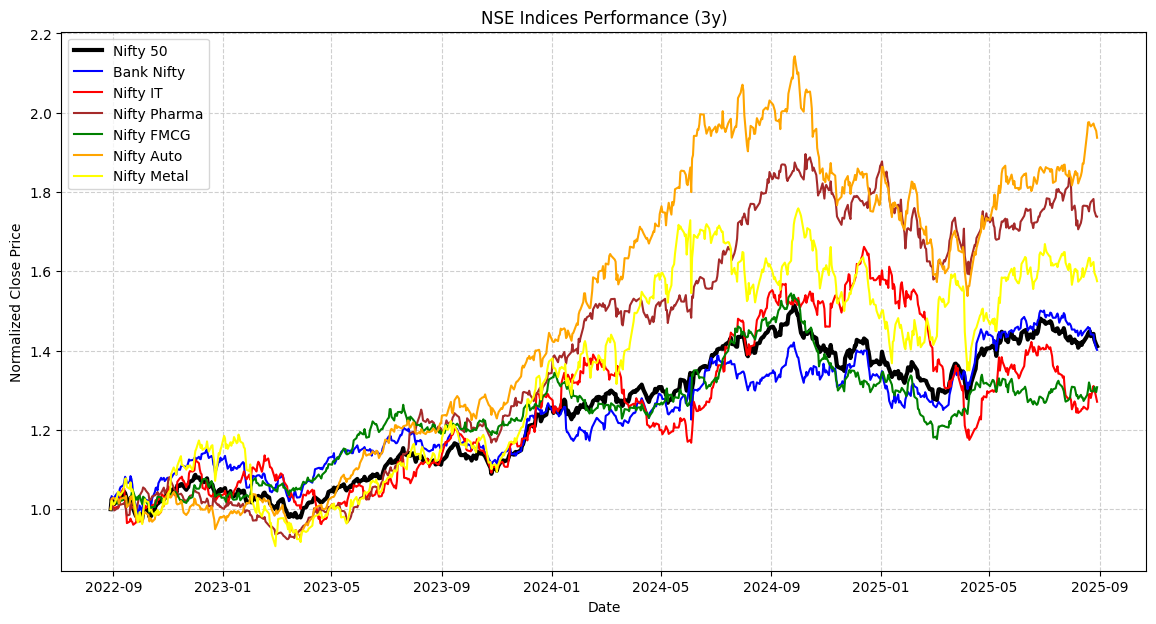

In [24]:
# -----------------------------
# User Input: Time Frame
# -----------------------------
# Examples: "5y", "1y", "6mo", "3mo", "1mo"
time_frame = "1mo"
#slice_and_plot(data, time_frame)

slice_and_plot(data, "1mo")
slice_and_plot(data, "3mo")
slice_and_plot(data, "6mo")
slice_and_plot(data, "1y")
slice_and_plot(data, "3y")